In [1]:
import pandas as pd
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train-2.csv')
df.head()

/Users/saismailzain/opt/anaconda3/envs/tf/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [4]:
df.shape

(1017209, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [6]:
df2=df.reindex(index=df.index[::-1])

In [7]:
df2.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017208,1115,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1


In [8]:
df2.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
4,5,5,2015-07-31,4822,559,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
0,1,5,2015-07-31,5263,555,1,1,0,1


In [9]:
atr2=df2[df2.Store==733]

In [10]:
atr2.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1015712,733,3,2013-01-02,12477,3121,1,0,0,1
1014597,733,4,2013-01-03,12639,2978,1,0,0,1
1013482,733,5,2013-01-04,12078,3042,1,0,0,1
1012367,733,6,2013-01-05,10674,2694,1,0,0,0


In [11]:
atr2.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
5192,733,1,2015-07-27,15907,3282,1,1,0,1
4077,733,2,2015-07-28,14433,3148,1,1,0,1
2962,733,3,2015-07-29,14145,3184,1,1,0,1
1847,733,4,2015-07-30,14531,3145,1,1,0,1
732,733,5,2015-07-31,16625,3644,1,1,0,1


In [12]:
atr2.shape

(942, 9)

In [13]:
atr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942 entries, 1016827 to 732
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Store          942 non-null    int64 
 1   DayOfWeek      942 non-null    int64 
 2   Date           942 non-null    object
 3   Sales          942 non-null    int64 
 4   Customers      942 non-null    int64 
 5   Open           942 non-null    int64 
 6   Promo          942 non-null    int64 
 7   StateHoliday   942 non-null    object
 8   SchoolHoliday  942 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 73.6+ KB


In [14]:
atr2.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,942.0,942.000000,942.000000,942.000000,942.0,942.000000,942.000000
mean,733.0,3.997877,14933.288747,3403.458599,1.0,0.382166,0.180467
std,0.0,1.998404,1838.044097,338.490827,0.0,0.486175,0.384780
min,733.0,1.000000,6838.000000,1329.000000,1.0,0.000000,0.000000
25%,733.0,2.000000,13698.500000,3209.000000,1.0,0.000000,0.000000
50%,733.0,4.000000,14795.500000,3393.000000,1.0,0.000000,0.000000
75%,733.0,6.000000,16092.000000,3586.750000,1.0,1.000000,0.000000
max,733.0,7.000000,22137.000000,4645.000000,1.0,1.000000,1.000000


In [15]:
atr2.Sales.value_counts()

15383    3
16396    3
13070    3
15563    3
15907    3
        ..
19118    1
17824    1
15813    1
18194    1
16625    1
Name: Sales, Length: 867, dtype: int64

In [16]:
atr2=atr2.set_index('Date')

In [17]:
atr2.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2013-01-01,733,2,10765,2377,1,0,a,1
2013-01-02,733,3,12477,3121,1,0,0,1
2013-01-03,733,4,12639,2978,1,0,0,1
2013-01-04,733,5,12078,3042,1,0,0,1
2013-01-05,733,6,10674,2694,1,0,0,0


In [18]:
atr2=atr2.drop(columns=['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'])

In [19]:
atr2.head()

,Sales
Date,
2013-01-01,10765
2013-01-02,12477
2013-01-03,12639
2013-01-04,12078
2013-01-05,10674


In [20]:
atr2.tail()

,Sales
Date,
2015-07-27,15907
2015-07-28,14433
2015-07-29,14145
2015-07-30,14531
2015-07-31,16625


<AxesSubplot:xlabel='Date'>

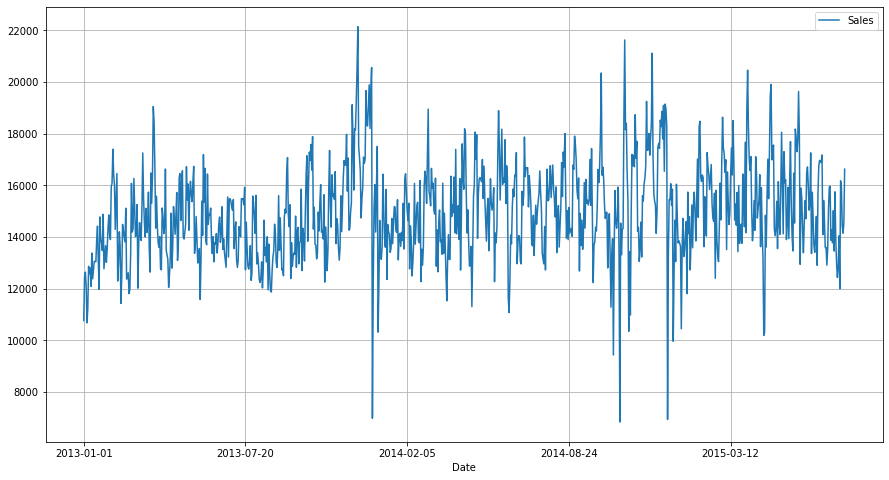

In [21]:
atr2.plot(figsize=(15,8), grid=True)

In [22]:
df1=atr2.reset_index()['Sales']

In [23]:
df1

0      10765
1      12477
2      12639
3      12078
4      10674
       ...  
937    15907
938    14433
939    14145
940    14531
941    16625
Name: Sales, Length: 942, dtype: int64

In [24]:
df1.shape

(942,)

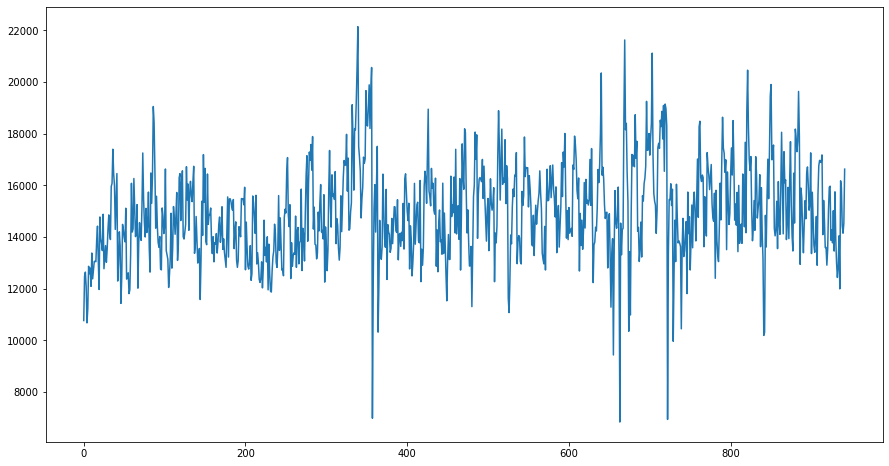

In [25]:
plt.rcParams['figure.figsize']=[15,8]
plt.plot(df1)

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0.5,1)) ## Scaling range is btw 0-1.
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [27]:
df1

array([[0.62834172],
       [0.68429309],
       [0.68958755],
       [0.67125302],
       [0.62536767],
       [0.64340807],
       [0.69697366],
       [0.68756128],
       [0.69465325],
       [0.67157984],
       [0.71373946],
       [0.68105759],
       [0.69249624],
       [0.70311785],
       [0.70334662],
       [0.70272567],
       [0.73001503],
       [0.74772861],
       [0.70367344],
       [0.66765802],
       [0.75936336],
       [0.73177985],
       [0.72596248],
       [0.71681156],
       [0.76276227],
       [0.69386888],
       [0.7095235 ],
       [0.72311916],
       [0.70200667],
       [0.71916465],
       [0.7444931 ],
       [0.76194523],
       [0.7374665 ],
       [0.73083208],
       [0.79789529],
       [0.80188248],
       [0.84502255],
       [0.81390941],
       [0.79923524],
       [0.74364338],
       [0.78014903],
       [0.81426891],
       [0.67831231],
       [0.70001307],
       [0.7405386 ],
       [0.72289038],
       [0.65004249],
       [0.683

In [28]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [29]:
training_size,test_size

(612, 330)

In [30]:
train_data

array([[0.62834172],
       [0.68429309],
       [0.68958755],
       [0.67125302],
       [0.62536767],
       [0.64340807],
       [0.69697366],
       [0.68756128],
       [0.69465325],
       [0.67157984],
       [0.71373946],
       [0.68105759],
       [0.69249624],
       [0.70311785],
       [0.70334662],
       [0.70272567],
       [0.73001503],
       [0.74772861],
       [0.70367344],
       [0.66765802],
       [0.75936336],
       [0.73177985],
       [0.72596248],
       [0.71681156],
       [0.76276227],
       [0.69386888],
       [0.7095235 ],
       [0.72311916],
       [0.70200667],
       [0.71916465],
       [0.7444931 ],
       [0.76194523],
       [0.7374665 ],
       [0.73083208],
       [0.79789529],
       [0.80188248],
       [0.84502255],
       [0.81390941],
       [0.79923524],
       [0.74364338],
       [0.78014903],
       [0.81426891],
       [0.67831231],
       [0.70001307],
       [0.7405386 ],
       [0.72289038],
       [0.65004249],
       [0.683

In [31]:
test_data

array([[0.80864762],
       [0.69099288],
       [0.76387346],
       [0.72328257],
       [0.75534349],
       [0.71847833],
       [0.74102883],
       [0.8029283 ],
       [0.74534283],
       [0.8068828 ],
       [0.77665207],
       [0.78057389],
       [0.77446238],
       [0.78031244],
       [0.83211321],
       [0.7740702 ],
       [0.84587228],
       [0.76148768],
       [0.67631871],
       [0.72419766],
       [0.72756389],
       [0.74632329],
       [0.74171514],
       [0.76965815],
       [0.81936728],
       [0.80279757],
       [0.82508661],
       [0.86521995],
       [0.94146676],
       [0.81224263],
       [0.82227597],
       [0.80737303],
       [0.77449507],
       [0.75736976],
       [0.76485391],
       [0.76534414],
       [0.69488202],
       [0.75397085],
       [0.76348127],
       [0.709164  ],
       [0.64530361],
       [0.71164782],
       [0.73194326],
       [0.58480946],
       [0.72017779],
       [0.79273155],
       [0.75312112],
       [0.745

In [32]:
len(train_data), len(test_data)

(612, 330)

In [33]:
atr2.iloc[0:612] #train

,Sales
Date,
2013-01-01,10765
2013-01-02,12477
2013-01-03,12639
2013-01-04,12078
2013-01-05,10674
...,...
2014-08-31,17903
2014-09-01,17587
2014-09-02,16977


Train ranges from the date 2013/01/01 to 2014/09/04

In [34]:
atr2.iloc[612:]  #test

,Sales
Date,
2014-09-05,16282
2014-09-06,12682
2014-09-07,14912
2014-09-08,13670
2014-09-09,14651
...,...
2015-07-27,15907
2015-07-28,14433
2015-07-29,14145


Test ranges from the date 2014/09/05 to 2015/07/31

In [35]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [36]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [37]:
print(X_train)

[[0.62834172 0.68429309 0.68958755 ... 0.77073665 0.76027845 0.73828355]
 [0.68429309 0.68958755 0.67125302 ... 0.76027845 0.73828355 0.74655206]
 [0.68958755 0.67125302 0.62536767 ... 0.73828355 0.74655206 0.82002092]
 ...
 [0.67746258 0.73906791 0.72648539 ... 0.82511929 0.81953069 0.86162494]
 [0.73906791 0.72648539 0.74766325 ... 0.81953069 0.86162494 0.85129747]
 [0.72648539 0.74766325 0.83462971 ... 0.86162494 0.85129747 0.83136153]]


In [38]:
print(y_train)

[0.74655206 0.82002092 0.71697497 0.71148441 0.70586313 0.6702072
 0.68622132 0.70674554 0.76403687 0.69465325 0.72014511 0.77253415
 0.75851363 0.7374665  0.76106281 0.79034577 0.70442513 0.72439375
 0.80897444 0.81413818 0.75478789 0.80184979 0.8177005  0.73445977
 0.73145304 0.73988496 0.74998366 0.8229296  0.78083535 0.80103275
 0.74253219 0.78894045 0.80439898 0.78586836 0.77874371 0.80361462
 0.82345251 0.7133146  0.72396889 0.75998431 0.73142035 0.70105889
 0.70615727 0.71952415 0.65494477 0.70367344 0.77926662 0.7360285
 0.83822472 0.77809007 0.82083796 0.72831558 0.72426302 0.81368063
 0.7500817  0.76233741 0.76220668 0.77067129 0.73011308 0.71302046
 0.73436172 0.70259494 0.72704098 0.72488398 0.73834891 0.71370678
 0.7273678  0.74998366 0.75926531 0.72733512 0.73955814 0.7722727
 0.7183476  0.73174717 0.7143931  0.70560167 0.6956337  0.73919864
 0.78469181 0.70864109 0.78207726 0.78243676 0.77926662 0.77178247
 0.76795869 0.78139094 0.71929538 0.74174783 0.7531538  0.7045558

In [39]:
print(X_train.shape), print(y_train.shape)

(511, 100)
(511,)


(None, None)

In [40]:
print(X_test.shape), print(ytest.shape)

(229, 100)
(229,)


(None, None)

In [41]:
X_train.shape

(511, 100)

In [42]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],1,X_train.shape[1] )
X_test = X_test.reshape(X_test.shape[0],1,X_test.shape[1])

In [43]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
model=Sequential()
model.add(LSTM(50, input_shape=(1,100)))
model.add(Dense(50,activation='relu'))
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam', metrics=['mape'])

2022-03-23 22:51:32.669877: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-23 22:51:32.670690: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                30200     
_________________________________________________________________
dense (Dense)                (None, 50)                2550      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 32,801
Trainable params: 32,801
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

Train on 511 samples, validate on 229 samples
Epoch 1/150


2022-03-23 22:51:33.973613: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference___backward_cudnn_lstm_with_fallback_2436_2618' and '__inference___backward_standard_lstm_2741_3226_specialized_for_StatefulPartitionedCall_at___inference_distributed_function_3347' both implement 'lstm_309cac69-6c22-4da4-a1d9-eb0f15708a54' but their signatures do not match.


 64/511 [==>...........................] - ETA: 12s - loss: 0.9179 - mape: 120.8429

2022-03-23 22:51:35.165297: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_standard_lstm_3564' and '__inference_standard_lstm_3564_specialized_for_sequential_lstm_StatefulPartitionedCall_at___inference_distributed_function_3925' both implement 'lstm_74fdb979-f06e-413f-90cf-e8549e822d5d' but their signatures do not match.


511/511 [==============================] - 2s 5ms/sample - loss: 0.6435 - mape: 84.3792 - val_loss: 0.3767 - val_mape: 48.1634
Epoch 2/150
511/511 [==============================] - 0s 176us/sample - loss: 0.1815 - mape: 23.6418 - val_loss: 0.0931 - val_mape: 12.6475
Epoch 3/150
511/511 [==============================] - 0s 171us/sample - loss: 0.0826 - mape: 11.1796 - val_loss: 0.0658 - val_mape: 8.2044
Epoch 4/150
511/511 [==============================] - 0s 161us/sample - loss: 0.0570 - mape: 7.2863 - val_loss: 0.0561 - val_mape: 7.6125
Epoch 5/150
511/511 [==============================] - 0s 175us/sample - loss: 0.0483 - mape: 6.4437 - val_loss: 0.0558 - val_mape: 7.0207
Epoch 6/150
511/511 [==============================] - 0s 169us/sample - loss: 0.0450 - mape: 5.8310 - val_loss: 0.0494 - val_mape: 6.5817
Epoch 7/150
511/511 [==============================] - 0s 165us/sample - loss: 0.0432 - mape: 5.7279 - val_loss: 0.0511 - val_mape: 6.5041
Epoch 8/150
511/511 [===============

In [47]:
modela=Sequential()
modela.add(LSTM(30, input_shape=(1,100)))
modela.add(Dense(30,activation='relu'))
modela.add(Dense(1))
modela.compile(loss='mae',optimizer='adam', metrics=['mape'])

In [48]:
modela.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30)                15720     
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 16,681
Trainable params: 16,681
Non-trainable params: 0
_________________________________________________________________


In [49]:
modela.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

Train on 511 samples, validate on 229 samples
Epoch 1/150


2022-03-23 22:51:51.739782: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference___backward_standard_lstm_13082_13567_specialized_for_StatefulPartitionedCall_at___inference_distributed_function_13688' and '__inference___backward_cudnn_lstm_with_fallback_12777_12959' both implement 'lstm_8f86d868-290c-4c5c-93f7-6af8e70c46aa' but their signatures do not match.


 64/511 [==>...........................] - ETA: 11s - loss: 0.8326 - mape: 108.8416

2022-03-23 22:51:52.915135: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_standard_lstm_13905_specialized_for_sequential_1_lstm_1_StatefulPartitionedCall_at___inference_distributed_function_14266' and '__inference_standard_lstm_13905' both implement 'lstm_53ce39d7-d1b9-492a-963f-5a7a196467f4' but their signatures do not match.


511/511 [==============================] - 2s 4ms/sample - loss: 0.6094 - mape: 79.8340 - val_loss: 0.3862 - val_mape: 49.3832
Epoch 2/150
511/511 [==============================] - 0s 158us/sample - loss: 0.1902 - mape: 24.6988 - val_loss: 0.0851 - val_mape: 11.5753
Epoch 3/150
511/511 [==============================] - 0s 145us/sample - loss: 0.0890 - mape: 12.1242 - val_loss: 0.0493 - val_mape: 6.4089
Epoch 4/150
511/511 [==============================] - 0s 143us/sample - loss: 0.0547 - mape: 6.9309 - val_loss: 0.0502 - val_mape: 6.4291
Epoch 5/150
511/511 [==============================] - 0s 147us/sample - loss: 0.0486 - mape: 6.5023 - val_loss: 0.0493 - val_mape: 6.5036
Epoch 6/150
511/511 [==============================] - 0s 145us/sample - loss: 0.0458 - mape: 5.9000 - val_loss: 0.0507 - val_mape: 6.4718
Epoch 7/150
511/511 [==============================] - 0s 140us/sample - loss: 0.0441 - mape: 5.7985 - val_loss: 0.0493 - val_mape: 6.5082
Epoch 8/150
511/511 [===============

***Let's Hypertune***

In [50]:
import tensorflow as tf
from tensorflow import keras

In [51]:
!pip install -q -U keras-tuner

In [52]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

/Users/saismailzain/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  after removing the cwd from sys.path.


In [53]:
import pandas as pd
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import matplotlib.pyplot as plt 
from tensorflow.keras.layers import Dropout

***Hypertune***

In [54]:
def build_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('input_unit',min_value=30,max_value=300,step=30),return_sequences=True, input_shape=(1,100)))
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(LSTM(hp.Int(f'lstm_{i}_units',min_value=30,max_value=300,step=30),return_sequences=True))
    model.add(LSTM(hp.Int('layer_2_neurons',min_value=30,max_value=300,step=30)))
    model.add(Dense(hp.Int(f'rnn_{i}_units',min_value=16,max_value=256,step=16),activation="relu"))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),loss='mae',metrics=['mape'])
    return model

In [55]:
tuner= RandomSearch(
        build_model,
        objective='mape',
        max_trials=5,
        executions_per_trial=3,
        directory='proj77c',
        project_name='Rossmann forecasting'
        )

In [56]:
tuner.search_space_summary()

Search space summary
Default search space size: 7
input_unit (Int)
{'default': None, 'conditions': [], 'min_value': 30, 'max_value': 300, 'step': 30, 'sampling': None}
n_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': None}
lstm_0_units (Int)
{'default': None, 'conditions': [], 'min_value': 30, 'max_value': 300, 'step': 30, 'sampling': None}
layer_2_neurons (Int)
{'default': None, 'conditions': [], 'min_value': 30, 'max_value': 300, 'step': 30, 'sampling': None}
rnn_0_units (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 16, 'sampling': None}
Dropout_rate (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [57]:
tuner.search(
        x=X_train,
        y=y_train,
        epochs=100,
        batch_size=128,
        validation_data=(X_test,ytest),
)

Trial 5 Complete [00h 02m 44s]
mape: 13.915972709655762

Best mape So Far: 4.602134704589844
Total elapsed time: 00h 11m 26s
INFO:tensorflow:Oracle triggered exit


In [58]:
tuner.results_summary()

Results summary
Results in proj77c/Rossmann forecasting
Showing 10 best trials
Trial summary
Hyperparameters:
input_unit: 240
n_layers: 2
lstm_0_units: 270
layer_2_neurons: 60
rnn_0_units: 128
Dropout_rate: 0.0
learning_rate: 0.001
lstm_1_units: 240
lstm_2_units: 240
rnn_2_units: 128
rnn_1_units: 16
Score: 4.602134704589844
Trial summary
Hyperparameters:
input_unit: 150
n_layers: 3
lstm_0_units: 60
layer_2_neurons: 60
rnn_0_units: 96
Dropout_rate: 0.30000000000000004
learning_rate: 0.01
lstm_1_units: 240
lstm_2_units: 210
rnn_2_units: 96
Score: 5.823448181152344
Trial summary
Hyperparameters:
input_unit: 270
n_layers: 3
lstm_0_units: 30
layer_2_neurons: 60
rnn_0_units: 48
Dropout_rate: 0.1
learning_rate: 0.001
lstm_1_units: 30
lstm_2_units: 30
rnn_2_units: 16
Score: 9.619590759277344
Trial summary
Hyperparameters:
input_unit: 120
n_layers: 4
lstm_0_units: 240
layer_2_neurons: 180
rnn_0_units: 48
Dropout_rate: 0.4
learning_rate: 0.0001
lstm_1_units: 150
lstm_2_units: 240
rnn_2_units: 16

In [59]:
from tensorflow.keras import optimizers

In [60]:
modelcc=Sequential()
modelcc.add(LSTM(240, return_sequences=True, input_shape=(1,100)))
modelcc.add(LSTM(270, return_sequences=True))
modelcc.add(LSTM(240, return_sequences=True))
modelcc.add(LSTM(240, return_sequences=True))
modelcc.add(LSTM(60))
modelcc.add(Dense(128, activation='relu'))
modelcc.add(Dropout(0.0))
modelcc.add(Dense(16, activation='relu'))
modelcc.add(Dense(128, activation='relu'))
modelcc.add(Dense(1))
sgd=optimizers.SGD(lr=0.01)
modelcc.compile(loss='mae',optimizer='adam', metrics=['mape'])

In [61]:
modelcc.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 1, 240)            327360    
_________________________________________________________________
lstm_7 (LSTM)                (None, 1, 270)            551880    
_________________________________________________________________
lstm_8 (LSTM)                (None, 1, 240)            490560    
_________________________________________________________________
lstm_9 (LSTM)                (None, 1, 240)            461760    
_________________________________________________________________
lstm_10 (LSTM)               (None, 60)                72240     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               7808      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [62]:
modelcc.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

Train on 511 samples, validate on 229 samples
Epoch 1/150


2022-03-23 23:25:13.248268: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference___backward_standard_lstm_338306_338791_specialized_for_StatefulPartitionedCall_2_at___inference_distributed_function_340040' and '__inference___backward_standard_lstm_338306_338791' both implement 'lstm_46c16b64-2bd5-44fe-bc87-8b3f9e29c807' but their signatures do not match.


448/511 [=========================>....] - ETA: 1s - loss: 0.7333 - mape: 96.4149

2022-03-23 23:25:18.419006: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_standard_lstm_341197' and '__inference_standard_lstm_341197_specialized_for_sequential_1_lstm_8_StatefulPartitionedCall_at___inference_distributed_function_342511' both implement 'lstm_72c57b89-9892-4e79-808c-e92cdcbcbcb8' but their signatures do not match.


511/511 [==============================] - 9s 18ms/sample - loss: 0.7287 - mape: 95.6500 - val_loss: 0.6832 - val_mape: 87.8809
Epoch 2/150
511/511 [==============================] - 1s 1ms/sample - loss: 0.4761 - mape: 62.3034 - val_loss: 0.1775 - val_mape: 23.6800
Epoch 3/150
511/511 [==============================] - 1s 1ms/sample - loss: 0.1519 - mape: 20.0609 - val_loss: 0.1614 - val_mape: 20.3293
Epoch 4/150
511/511 [==============================] - 1s 1ms/sample - loss: 0.0851 - mape: 11.2031 - val_loss: 0.0510 - val_mape: 6.4885
Epoch 5/150
511/511 [==============================] - 1s 1ms/sample - loss: 0.0542 - mape: 6.9761 - val_loss: 0.0558 - val_mape: 7.5529
Epoch 6/150
511/511 [==============================] - 1s 1ms/sample - loss: 0.0505 - mape: 6.5978 - val_loss: 0.0528 - val_mape: 6.6732
Epoch 7/150
511/511 [==============================] - 1s 1ms/sample - loss: 0.0465 - mape: 6.1715 - val_loss: 0.0578 - val_mape: 7.2296
Epoch 8/150
511/511 [========================

In [63]:
#Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

2022-03-23 23:29:27.274457: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_cudnn_lstm_with_fallback_349278' and '__inference_standard_lstm_349167_specialized_for_sequential_lstm_StatefulPartitionedCall_at___inference_distributed_function_349476' both implement 'lstm_e25914f5-b2a6-42a1-a96f-d2b67e841987' but their signatures do not match.


In [64]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [65]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

14899.343833451529

In [66]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

15335.391616343102

In [67]:
print(test_predict)

[[16370.244 ]
 [17024.082 ]
 [17117.082 ]
 [15678.164 ]
 [16738.61  ]
 [18162.172 ]
 [16636.26  ]
 [16462.32  ]
 [17212.38  ]
 [17217.04  ]
 [16078.478 ]
 [13767.018 ]
 [15430.75  ]
 [14292.384 ]
 [15134.61  ]
 [17693.934 ]
 [18414.277 ]
 [17151.752 ]
 [16043.663 ]
 [16723.605 ]
 [14816.448 ]
 [14178.833 ]
 [14475.207 ]
 [14968.497 ]
 [13513.585 ]
 [13490.011 ]
 [14741.859 ]
 [13058.728 ]
 [13979.514 ]
 [15040.923 ]
 [15357.934 ]
 [14015.791 ]
 [14739.758 ]
 [15758.136 ]
 [13917.327 ]
 [13335.259 ]
 [15134.063 ]
 [14480.051 ]
 [12590.915 ]
 [13332.452 ]
 [14763.613 ]
 [13696.556 ]
 [13771.373 ]
 [14956.843 ]
 [15553.241 ]
 [13295.062 ]
 [13485.619 ]
 [15269.855 ]
 [14893.4375]
 [15437.87  ]
 [16270.649 ]
 [16622.111 ]
 [15709.373 ]
 [15634.915 ]
 [16311.0205]
 [13673.025 ]
 [14111.602 ]
 [13953.696 ]
 [14364.912 ]
 [13088.965 ]
 [15319.926 ]
 [18006.07  ]
 [15520.075 ]
 [16994.113 ]
 [16725.002 ]
 [17325.436 ]
 [14774.572 ]
 [14703.86  ]
 [15376.145 ]
 [12957.459 ]
 [13729.703 ]
 [1452

In [68]:
len(train_predict)

511

In [69]:
len(test_predict)

229

In [70]:
test_data.shape

(330, 1)

In [71]:
test_predict.shape

(229, 1)

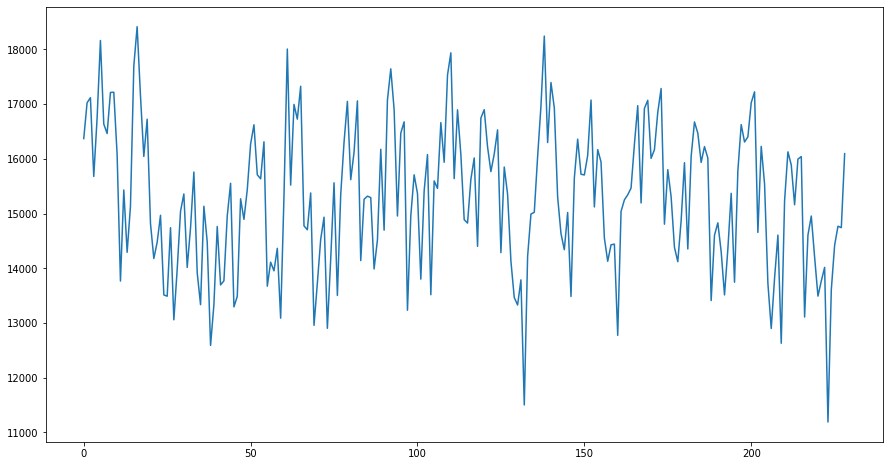

In [72]:
plt.plot(test_predict)

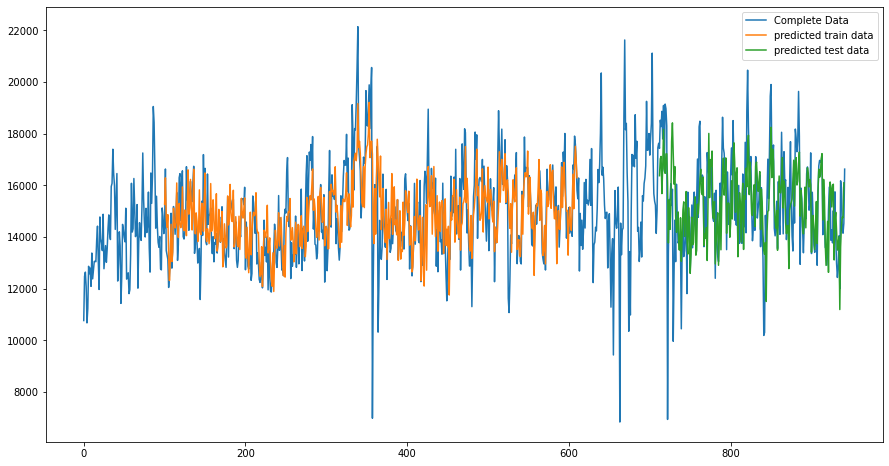

In [73]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1), label='Complete Data')
plt.plot(trainPredictPlot, label='predicted train data')
plt.plot(testPredictPlot, label='predicted test data')
plt.legend()
plt.show()

In [74]:
len(test_data)

330

In [75]:
x_input=test_data[230:].reshape(1,-1)
x_input.shape

(1, 100)

In [76]:
temp_input=list(x_input) # converting to a list
temp_input=temp_input[0].tolist() # storing the values here

In [77]:
temp_input #All my test_data is present here (previous 100 days data)

[0.6133407412249167,
 0.7613896333093666,
 0.7213216550101313,
 0.7846264461729524,
 0.8324400287600497,
 0.7824694424472187,
 0.8419504542780574,
 0.9121511209883,
 0.9268579645728479,
 0.8316556637688739,
 0.8374730374534283,
 0.8503496960585659,
 0.7450160141185699,
 0.7354729067259298,
 0.7447218772468789,
 0.7792339368586183,
 0.719295378782927,
 0.8041048434538205,
 0.7513236159226093,
 0.7373684554546049,
 0.7947578273089744,
 0.866461860252304,
 0.8003464278711028,
 0.7379894110726191,
 0.841917772403425,
 0.8025361134714688,
 0.8063272109288189,
 0.7307340349042422,
 0.751487025295771,
 0.7967841035361789,
 0.7319759461402706,
 0.8047911628210995,
 0.8545983397607686,
 0.7739721550428132,
 0.7350153604810772,
 0.7162886463167528,
 0.8147264527093274,
 0.7516504346689326,
 0.8705144127067128,
 0.859598666579515,
 0.8418524086541603,
 0.8551539316295182,
 0.9180992221713837,
 0.8615595790574548,
 0.699424799006471,
 0.795901692921106,
 0.7827962611935422,
 0.7429570560167331,
 0

In [78]:
len(temp_input)

100

In [79]:
# demonstrate prediction for next 80 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<80):
    
    if(len(temp_input)>100): # Now if there are greater than 100 elements, start from the 1st index element
        
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1,1,n_steps))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,1, n_steps)) # All the previous 100 days data will be passed here
        yhat = model.predict(x_input, verbose=0) # it will be predicted here
        print(yhat[0]) # I obtain my yhat value
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist()) # Now I'm adding my yhat value inside my final o/p i.e lst_output
        i=i+1                            # Now I'm also adding my yhat value in my previous i/p i.e temp_input
                                         # Now temp_input will have 101 elements.
    

print(lst_output)

[0.7396395]
101
1 day input [0.76138963 0.72132166 0.78462645 0.83244003 0.78246944 0.84195045
 0.91215112 0.92685796 0.83165566 0.83747304 0.8503497  0.74501601
 0.73547291 0.74472188 0.77923394 0.71929538 0.80410484 0.75132362
 0.73736846 0.79475783 0.86646186 0.80034643 0.73798941 0.84191777
 0.80253611 0.80632721 0.73073403 0.75148703 0.7967841  0.73197595
 0.80479116 0.85459834 0.77397216 0.73501536 0.71628865 0.81472645
 0.75165043 0.87051441 0.85959867 0.84185241 0.85515393 0.91809922
 0.86155958 0.6994248  0.79590169 0.78279626 0.74295706 0.71406628
 0.75014707 0.77995294 0.75704294 0.81420354 0.82263547 0.79966011
 0.76792601 0.77554089 0.84041441 0.71305314 0.79060723 0.75821949
 0.72367475 0.71462187 0.73289104 0.76001699 0.69828093 0.78792732
 0.82391006 0.83090398 0.82904111 0.82828943 0.83783254 0.73694359
 0.78021439 0.75521276 0.72060265 0.72102752 0.69841166 0.71815151
 0.76769724 0.79694751 0.79825479 0.72994967 0.74285901 0.72661612
 0.76727237 0.71622328 0.79113014 

In [80]:
lst_output

[[0.7396395206451416],
 [0.798079788684845],
 [0.7933238744735718],
 [0.7640566825866699],
 [0.7433697581291199],
 [0.7313287258148193],
 [0.7381027340888977],
 [0.6601055860519409],
 [0.7402912378311157],
 [0.7557574510574341],
 [0.7362620234489441],
 [0.7302743792533875],
 [0.7646836638450623],
 [0.7903537750244141],
 [0.71366947889328],
 [0.776159405708313],
 [0.7780591249465942],
 [0.7602032423019409],
 [0.7168912291526794],
 [0.7411352396011353],
 [0.7646229267120361],
 [0.6773456335067749],
 [0.7227118015289307],
 [0.7203385829925537],
 [0.7222973108291626],
 [0.7207046747207642],
 [0.7608349919319153],
 [0.7933286428451538],
 [0.7340496778488159],
 [0.7991307973861694],
 [0.7833883762359619],
 [0.7644550800323486],
 [0.7414610981941223],
 [0.7568163871765137],
 [0.7728278636932373],
 [0.6966067552566528],
 [0.7486765384674072],
 [0.741937518119812],
 [0.7325489521026611],
 [0.7168376445770264],
 [0.7411238551139832],
 [0.7661110162734985],
 [0.7124531269073486],
 [0.776226460933

In [81]:
len(lst_output)

80

In [82]:
fnl_output=scaler.inverse_transform(lst_output)

In [83]:
fnl_output

array([[14170.4900527 ],
       [15958.64537418],
       [15813.12391114],
       [14917.60637379],
       [14284.62785923],
       [13916.19635248],
       [14123.46745765],
       [11736.91072202],
       [14190.43129516],
       [14663.66648746],
       [14067.14539349],
       [13883.9354564 ],
       [14936.79074633],
       [15722.2448082 ],
       [13375.85871518],
       [15287.92549586],
       [15346.05310512],
       [14799.69880795],
       [13474.43782961],
       [14216.25606132],
       [14934.93231153],
       [12264.42169404],
       [13652.53570318],
       [13579.91996241],
       [13639.85311675],
       [13591.12163711],
       [14819.02908313],
       [15813.26981378],
       [13999.45204282],
       [15990.80413842],
       [15509.11753607],
       [14929.79653883],
       [14226.22668254],
       [14696.06781483],
       [15185.98697329],
       [12853.77349734],
       [14447.00472403],
       [14240.80417943],
       [13953.53283644],
       [13472.79824877],


In [84]:
import matplotlib.pyplot as plt

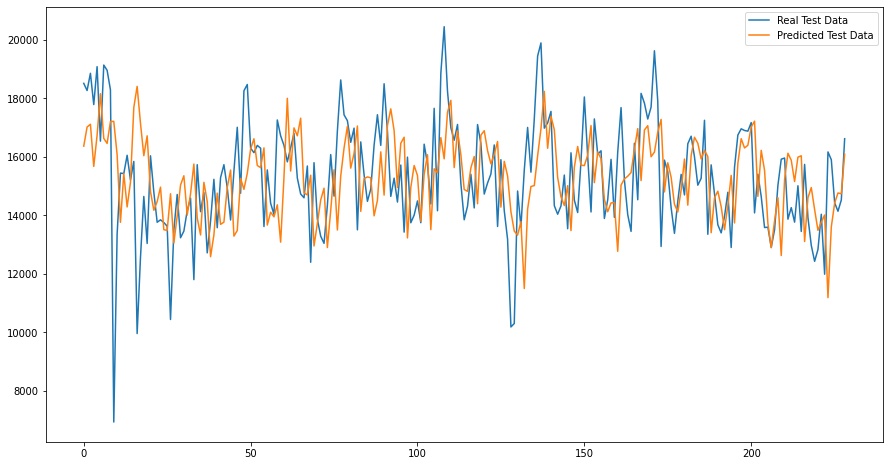

In [85]:
plt.plot(scaler.inverse_transform(df1[713:]),label='Real Test Data')
plt.plot(test_predict, label='Predicted Test Data')
plt.legend()
plt.show()

In [86]:
date = pd.date_range(start='2015/08/01', periods=80, freq='D')
date

DatetimeIndex(['2015-08-01', '2015-08-02', '2015-08-03', '2015-08-04',
               '2015-08-05', '2015-08-06', '2015-08-07', '2015-08-08',
               '2015-08-09', '2015-08-10', '2015-08-11', '2015-08-12',
               '2015-08-13', '2015-08-14', '2015-08-15', '2015-08-16',
               '2015-08-17', '2015-08-18', '2015-08-19', '2015-08-20',
               '2015-08-21', '2015-08-22', '2015-08-23', '2015-08-24',
               '2015-08-25', '2015-08-26', '2015-08-27', '2015-08-28',
               '2015-08-29', '2015-08-30', '2015-08-31', '2015-09-01',
               '2015-09-02', '2015-09-03', '2015-09-04', '2015-09-05',
               '2015-09-06', '2015-09-07', '2015-09-08', '2015-09-09',
               '2015-09-10', '2015-09-11', '2015-09-12', '2015-09-13',
               '2015-09-14', '2015-09-15', '2015-09-16', '2015-09-17',
               '2015-09-18', '2015-09-19', '2015-09-20', '2015-09-21',
               '2015-09-22', '2015-09-23', '2015-09-24', '2015-09-25',
      

In [87]:
ff=pd.DataFrame(fnl_output, columns=['Forecast'])

In [88]:
ff

,Forecast
0,14170.490053
1,15958.645374
2,15813.123911
3,14917.606374
4,14284.627859
...,...
75,15651.691766
76,16258.721497
77,14055.079246
78,15244.701841


In [89]:
ff['Time_Stamp'] = pd.DataFrame(date)

In [90]:
ff

,Forecast,Time_Stamp
0,14170.490053,2015-08-01
1,15958.645374,2015-08-02
2,15813.123911,2015-08-03
3,14917.606374,2015-08-04
4,14284.627859,2015-08-05
...,...,...
75,15651.691766,2015-10-15
76,16258.721497,2015-10-16
77,14055.079246,2015-10-17
78,15244.701841,2015-10-18


In [91]:
ff=ff.set_index('Time_Stamp')

In [92]:
ff

,Forecast
Time_Stamp,
2015-08-01,14170.490053
2015-08-02,15958.645374
2015-08-03,15813.123911
2015-08-04,14917.606374
2015-08-05,14284.627859
...,...
2015-10-15,15651.691766
2015-10-16,16258.721497
2015-10-17,14055.079246


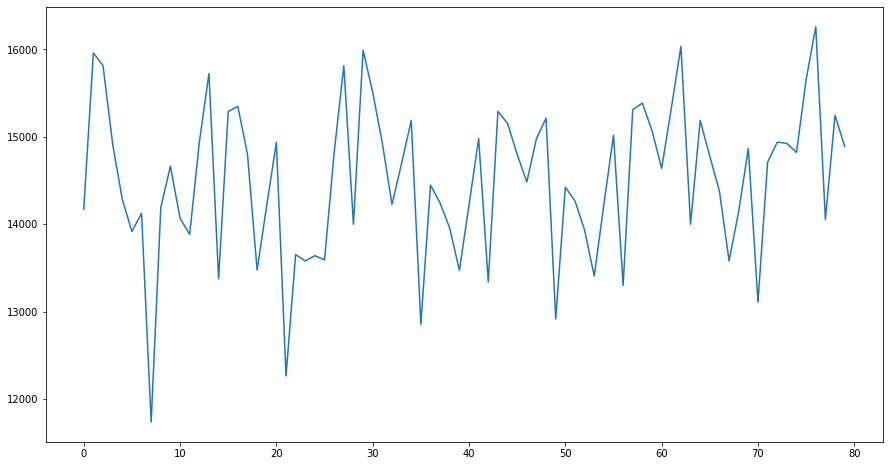

In [93]:
plt.plot(fnl_output)

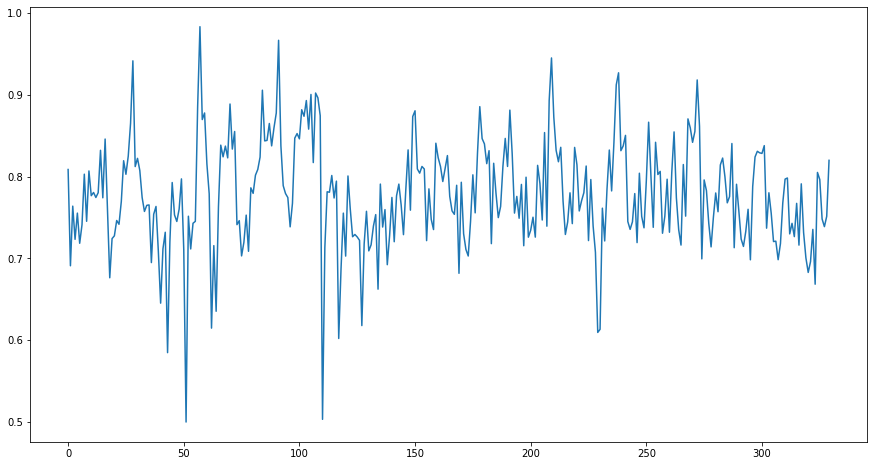

In [94]:
plt.plot(test_data)

In [95]:
day_new1=np.arange(1,331)
day_pred1=np.arange(331,411)

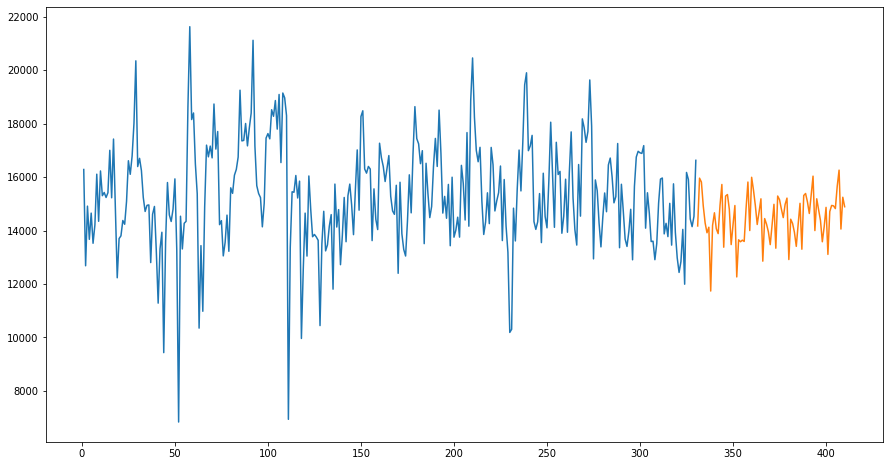

In [96]:
plt.plot(day_new1,scaler.inverse_transform(df1[612:]))
plt.plot(day_pred1,fnl_output)

In [97]:
daynew2=np.arange(1,230)
day3fore=np.arange(230,310)

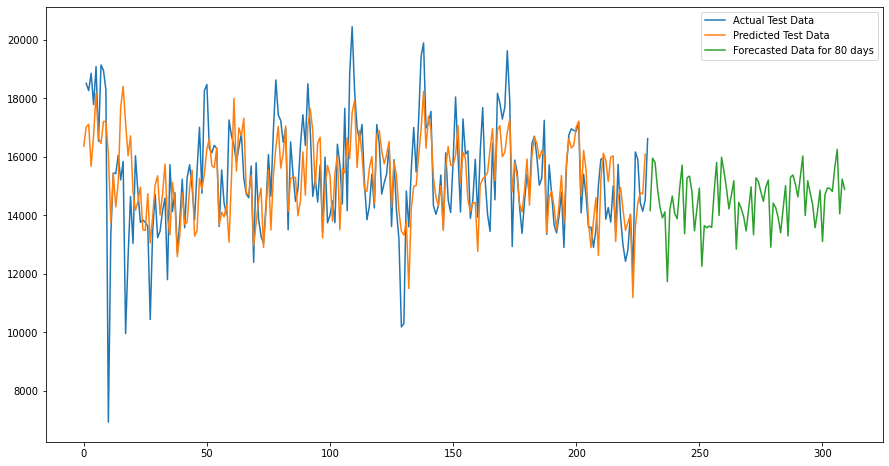

In [98]:
plt.plot(daynew2,scaler.inverse_transform(df1[713:]), label='Actual Test Data')
plt.plot(test_predict,label='Predicted Test Data')
plt.plot(day3fore,fnl_output, label='Forecasted Data for 80 days')
plt.legend()
plt.show()

In [99]:
vv=atr2.iloc[212:292]
vv.head()

,Sales
Date,
2013-08-01,14139
2013-08-02,15612
2013-08-03,12954
2013-08-04,13392
2013-08-05,12999


In [100]:
vv.tail()

,Sales
Date,
2013-10-15,13689
2013-10-16,13151
2013-10-17,13370
2013-10-18,14963
2013-10-19,14234


In [101]:
len(vv)

80

In [102]:
jj=atr2.iloc[577:657]

In [103]:
jj.head()

,Sales
Date,
2014-08-01,16761
2014-08-02,15521
2014-08-03,16139
2014-08-04,16785
2014-08-05,15835


In [104]:
jj.tail()

,Sales
Date,
2014-10-15,11284
2014-10-16,13314
2014-10-17,13935
2014-10-18,9433
2014-10-19,13575


In [105]:
len(jj)

80

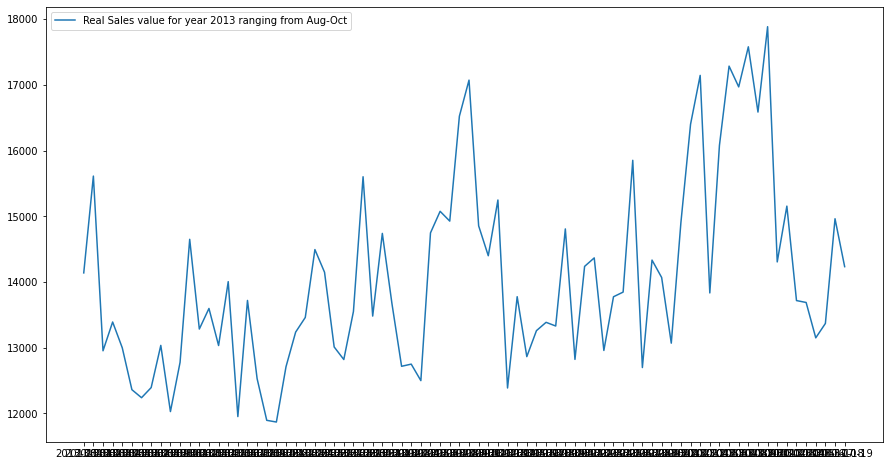

In [106]:
plt.plot(vv['Sales'], label='Real Sales value for year 2013 ranging from Aug-Oct')
plt.legend()
plt.show()

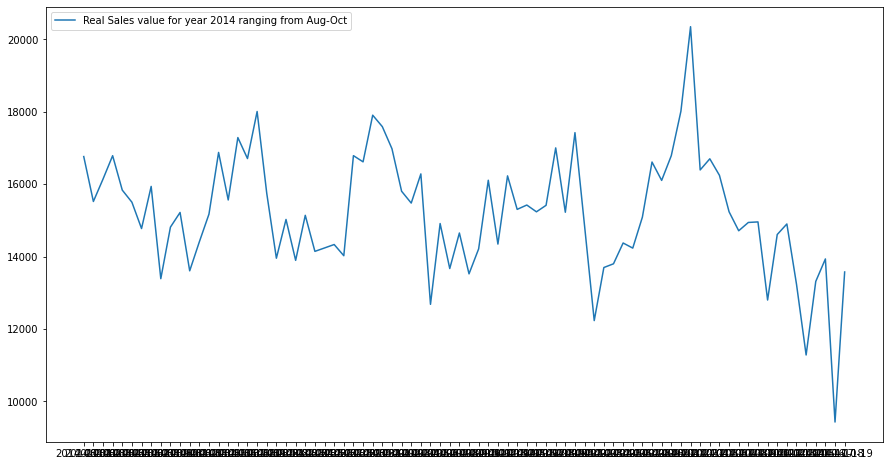

In [107]:
plt.plot(jj['Sales'],label='Real Sales value for year 2014 ranging from Aug-Oct')
plt.legend()
plt.show()

In [108]:
a1=vv.reset_index()['Sales']

In [109]:
a1

0     14139
1     15612
2     12954
3     13392
4     12999
      ...  
75    13689
76    13151
77    13370
78    14963
79    14234
Name: Sales, Length: 80, dtype: int64

In [110]:
len(a1)

80

In [111]:
b1=jj.reset_index()['Sales']

In [112]:
b1

0     16761
1     15521
2     16139
3     16785
4     15835
      ...  
75    11284
76    13314
77    13935
78     9433
79    13575
Name: Sales, Length: 80, dtype: int64

In [113]:
len(b1)

80

In [114]:
len(train_predict)

511

In [115]:
atr2.iloc[101:612]

,Sales
Date,
2013-04-12,16630
2013-04-13,13477
2013-04-14,13309
2013-04-15,13137
2013-04-16,12046
...,...
2014-08-31,17903
2014-09-01,17587
2014-09-02,16977


In [116]:
date1 = pd.date_range(start='2013/04/12', periods=511, freq='D')
date1

DatetimeIndex(['2013-04-12', '2013-04-13', '2013-04-14', '2013-04-15',
               '2013-04-16', '2013-04-17', '2013-04-18', '2013-04-19',
               '2013-04-20', '2013-04-21',
               ...
               '2014-08-26', '2014-08-27', '2014-08-28', '2014-08-29',
               '2014-08-30', '2014-08-31', '2014-09-01', '2014-09-02',
               '2014-09-03', '2014-09-04'],
              dtype='datetime64[ns]', length=511, freq='D')

In [117]:
njc=pd.DataFrame(train_predict, columns=['Predicted Train Data'])

In [118]:
njc

,Predicted Train Data
0,15260.750977
1,16285.985352
2,14768.398438
3,14376.905273
4,14861.708984
...,...
506,15089.784180
507,16746.810547
508,17508.533203
509,16922.351562


In [119]:
njc['time_Stamp'] = pd.DataFrame(date1)

In [120]:
njc

,Predicted Train Data,time_Stamp
0,15260.750977,2013-04-12
1,16285.985352,2013-04-13
2,14768.398438,2013-04-14
3,14376.905273,2013-04-15
4,14861.708984,2013-04-16
...,...,...
506,15089.784180,2014-08-31
507,16746.810547,2014-09-01
508,17508.533203,2014-09-02
509,16922.351562,2014-09-03


In [121]:
njc=njc.set_index('time_Stamp')

In [122]:
njc

,Predicted Train Data
time_Stamp,
2013-04-12,15260.750977
2013-04-13,16285.985352
2013-04-14,14768.398438
2013-04-15,14376.905273
2013-04-16,14861.708984
...,...
2014-08-31,15089.784180
2014-09-01,16746.810547
2014-09-02,17508.533203


In [123]:
njc.iloc[111:191]

,Predicted Train Data
time_Stamp,
2013-08-01,14822.940430
2013-08-02,14910.175781
2013-08-03,15710.383789
2013-08-04,14337.118164
2013-08-05,14160.495117
...,...
2013-10-15,15099.659180
2013-10-16,14367.575195
2013-10-17,13982.031250


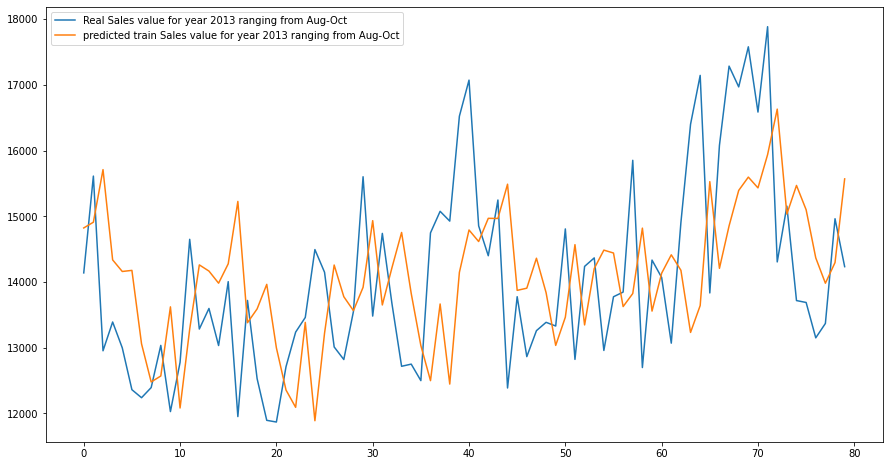

In [124]:
plt.plot(a1,label='Real Sales value for year 2013 ranging from Aug-Oct')
plt.plot(train_predict[111:191], label='predicted train Sales value for year 2013 ranging from Aug-Oct')
plt.legend()
plt.show()

In [125]:
daynewa=np.arange(1,81)
day3foreb=np.arange(81,161)

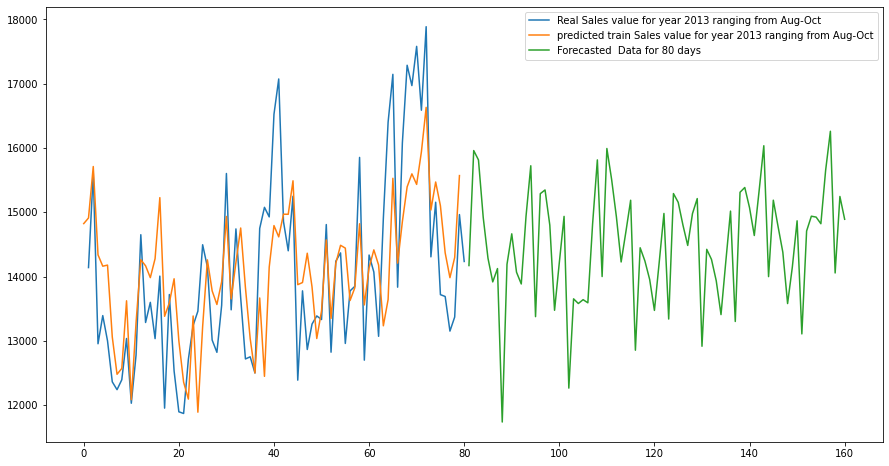

In [126]:
plt.plot(daynewa,a1,label='Real Sales value for year 2013 ranging from Aug-Oct')
plt.plot(train_predict[111:191], label='predicted train Sales value for year 2013 ranging from Aug-Oct')
plt.plot(day3foreb,fnl_output, label='Forecasted  Data for 80 days')
plt.legend()
plt.show()

In [127]:
nn=atr2.iloc[577:612]
nn.head()

,Sales
Date,
2014-08-01,16761
2014-08-02,15521
2014-08-03,16139
2014-08-04,16785
2014-08-05,15835


In [128]:
nn.tail()

,Sales
Date,
2014-08-31,17903
2014-09-01,17587
2014-09-02,16977
2014-09-03,15804
2014-09-04,15477


In [129]:
len(nn)

35

In [130]:
c1=nn.reset_index()['Sales']

In [131]:
c1

0     16761
1     15521
2     16139
3     16785
4     15835
5     15501
6     14774
7     15937
8     13390
9     14813
10    15218
11    13607
12    14406
13    15171
14    16875
15    15563
16    17285
17    16706
18    18005
19    15747
20    13955
21    15025
22    13896
23    15139
24    14144
25    14238
26    14333
27    14024
28    16786
29    16615
30    17903
31    17587
32    16977
33    15804
34    15477
Name: Sales, dtype: int64

In [132]:
len(c1)

35

In [133]:
njc.iloc[476:511]

,Predicted Train Data
time_Stamp,
2014-08-01,15927.136719
2014-08-02,16797.427734
2014-08-03,15108.955078
2014-08-04,16477.134766
2014-08-05,16580.384766
2014-08-06,15327.753906
2014-08-07,14710.581055
2014-08-08,14704.518555
2014-08-09,15167.259766


In [134]:
aar1=np.arange(1,36)
aar2=np.arange(36,71)

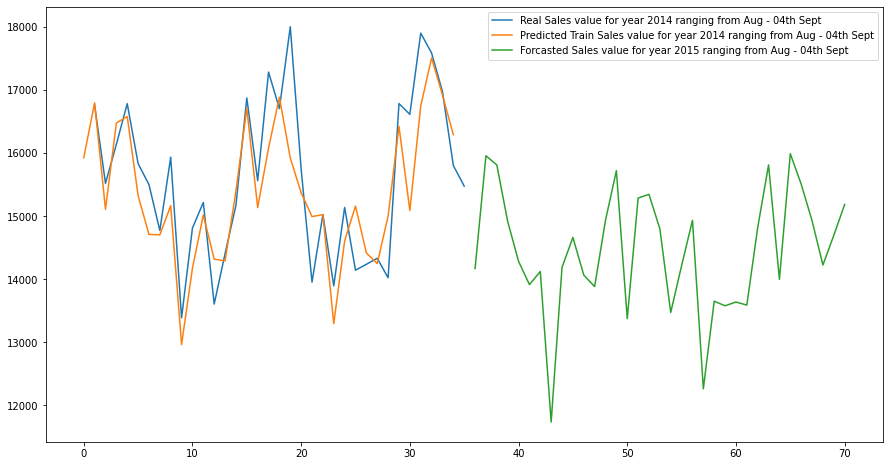

In [135]:
plt.plot(aar1,c1,label='Real Sales value for year 2014 ranging from Aug - 04th Sept')
plt.plot(train_predict[476:511], label='Predicted Train Sales value for year 2014 ranging from Aug - 04th Sept')
plt.plot(aar2,fnl_output[0:35], label='Forcasted Sales value for year 2015 ranging from Aug - 04th Sept')
plt.legend()
plt.show()

In [136]:
import jovian

In [137]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Committed successfully! https://jovian.ai/ismailzain1697/lstm-model-of-store-733


'https://jovian.ai/ismailzain1697/lstm-model-of-store-733'